# Stack of matrices
Start with a simple matrix product stack.

Expected output: a 3x2 grid with A, B, C, AB, and ABC blocks.
B is displayed with a trailing empty column to align with A.

In [1]:
import sympy as sym
from IPython.display import SVG, display
from matrixlayout.ge import ge_grid_svg


# Single Matrix with Symbols

This example shows a single augmented matrix with symbolic entries, row/column labels, highlights, and a path.


In [ ]:
from matrixlayout.ge import ge_grid_submatrix_spans

k = sym.Symbol("k")
Ab = sym.Matrix([[1, 2, 4, 1], [0, k**2 - 1, 8, k], [0, 0, 0, 0]])
matrices = [[None, Ab]]

decorations = [
    {"grid": (0, 1), "submatrix": ((0, 1), (0, 2)), "background": "yellow!20"},
    {"grid": (0, 1), "entries": [(0, 0), (1, 1), (1, 3)], "color": "BlueViolet", "bold": True},
    {"grid": (0, 1), "entries": [(0, 0), (1, 1)], "box": True},
    {"grid": (0, 1), "hlines": 2},
]

span = ge_grid_submatrix_spans(matrices, block_align="right", block_valign="bottom")[0]
row_labels = []
for i in range(Ab.rows):
    coord = rf"($ ({span.row_start + i}-{span.col_start}.west) + (-6mm,0) $)"
    row_labels.append((coord, rf"$r_{{{i+1}}}$", "anchor=east"))
col_labels = []
for j in range(Ab.cols):
    coord = rf"($ ({span.row_start}-{span.col_start + j}.north) + (0,6mm) $)"
    col_labels.append((coord, rf"$c_{{{j+1}}}$", "anchor=south"))

path = rf"\draw[red,line width=0.35mm] ({span.row_start}-{span.col_start}) -- ({span.row_start + 1}-{span.col_start}) -- ({span.row_start + 1}-{span.col_start + 1}) -- ({span.row_start + 1}-{span.col_start + 2});"

svg = ge_grid_svg(
    matrices=matrices,
    Nrhs=1,
    decorations=decorations,
    txt_with_locs=row_labels + col_labels,
    rowechelon_paths=[path],
    create_medium_nodes=True,
    block_align="right",
    block_valign="bottom",
)
display(SVG(svg))


# Vertical Layout of a Matrix Multiplication

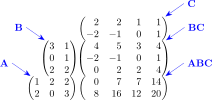

In [2]:
A = sym.Matrix([[1, 2, 2], [2, 0, 3]])
B = sym.Matrix([[3, 1], [0, 1], [2, 2]])
C = sym.Matrix([[2, 2, 1, 1], [-2, -1, 0, 1]])
AB = A * B
ABC = AB * C

matrices = [[None, C], [B, B * C], [A, ABC]]

style = {"angle_deg": -35, "length_mm": 8}
callouts = [
    {"grid_pos": (0, 1), "label": r"\mathbf{C}", "side": "right", **style},
    {"grid_pos": (1, 0), "label": r"\mathbf{B}", "side": "left", **style},
    {"grid_pos": (1, 1), "label": r"\mathbf{B C}", "side": "right", **style},
    {"grid_pos": (2, 0), "label": r"\mathbf{A}", "side": "left", **style},
    {"grid_pos": (2, 1), "label": r"\mathbf{A B C}", "side": "right", **style},
]

svg = ge_grid_svg(
    matrices=matrices,
    callouts=callouts,
    block_align="right",
    block_valign="bottom",
)
display(SVG(svg))


# Decorated Product Stack

This example adds row separators and highlights zero entries using decorators.


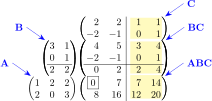

In [4]:
matrices = [[None, C], [B, B * C], [A, ABC]]

decorations = [
    {"grid": (0, 1), "submatrix": (None, "2:3"), "background": "yellow!25"},
    {"grid": (1, 1), "submatrix": (None, "2:3"), "background": "yellow!25"},
    {"grid": (2, 1), "submatrix": (None, "2:3"), "background": "yellow!25"},
    {"grid": (2, 1), "entries": [(0, 0)], "box": True},
    {"grid": (1, 0), "hlines": 2},
    {"grid": (1, 1), "hlines": 2},
    {"grid": (0, 1), "vlines": 2},
    {"grid": (1, 1), "vlines": 2},
    {"grid": (2, 1), "vlines": 2},
    {"grid": (0, 1), "label": r"\mathbf{C}", "side": "right", "angle": -35, "length": 8},
    {"grid": (1, 0), "label": r"\mathbf{B}", "side": "left", "angle": -35, "length": 8},
    {"grid": (1, 1), "label": r"\mathbf{B C}", "side": "right", "angle": -35, "length": 8},
    {"grid": (2, 0), "label": r"\mathbf{A}", "side": "left", "angle": -35, "length": 8},
    {"grid": (2, 1), "label": r"\mathbf{A B C}", "side": "right", "angle": -35, "length": 8},
]

svg = ge_grid_svg(
    matrices=matrices,
    decorations=decorations,
    create_medium_nodes=True,
    block_align="right",
    block_valign="bottom",
)
display(SVG(svg))
